In [1]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [2]:
import os
while 'juxtorpus' not in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"


# imports
import pandas as pd
from pathlib import Path
import spacy
from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus.corpus.corpora import Corpora

import warnings
warnings.filterwarnings('ignore')

# Juxtorpus
## A fast demo on binderhub for Eurovision

# 1. Build a Corpus (Auspol Tweets dataset)

In [3]:
use_cols = ['id', 'created_at', 'source', 'location', 'text', 'retweet_count', 'lang', 'possibly_sensitive', 'tweet_type']
dtypes = ['Int64', 'category', 'string', 'Int64', 'category', 'category', 'category']

df = pd.read_csv(Path('./notebooks/demos/Sample_Auspol_Tweets_Full.csv'), 
                 usecols=use_cols, 
                 dtype={'id': 'Int64', 'source': 'category', 'location':str, 'text':str, 'retweet_count':int, 'lang': 'category', 'tweet_type': 'category'}, 
                nrows=100)
df['created_at'] = pd.to_datetime(df['created_at'])
corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.load('en_core_web_sm'))
corpus.name

'auspol'

In [4]:
corpus.meta

{'id': <SeriesMeta [Id: id dtype: Int64]>,
 'created_at': <SeriesMeta [Id: created_at dtype: datetime64[ns]]>,
 'source': <SeriesMeta [Id: source dtype: category]>,
 'location': <SeriesMeta [Id: location dtype: object]>,
 'retweet_count': <SeriesMeta [Id: retweet_count dtype: int64]>,
 'lang': <SeriesMeta [Id: lang dtype: category]>,
 'possibly_sensitive': <SeriesMeta [Id: possibly_sensitive dtype: float64]>,
 'tweet_type': <SeriesMeta [Id: tweet_type dtype: category]>}

In [5]:
corpora = Corpora([corpus])
# corpora.add(corpus)   # alternatively
corpora.widget()

In [6]:
df.columns

Index(['id', 'created_at', 'source', 'location', 'text', 'retweet_count',
       'lang', 'possibly_sensitive', 'tweet_type'],
      dtype='object')

## Exploring the Corpus

In [7]:
corpus = corpora['auspol']
print('This table summarise the basic information of the corpus')
corpus.summary()

This table summarise the basic information of the corpus


Corpus Type                                                    SpacyCorpus
Number of Documents                                                    100
Number of Total Words                                                 1544
Size of Vocabulary                                                     730
mean Words per Document                                                 15
min Words per Document                                                   2
max Words per Document                                                  53
metas                    id, created_at, source, location, retweet_coun...

### Corpus Wordcloud

Generate a word cloud with one line of code


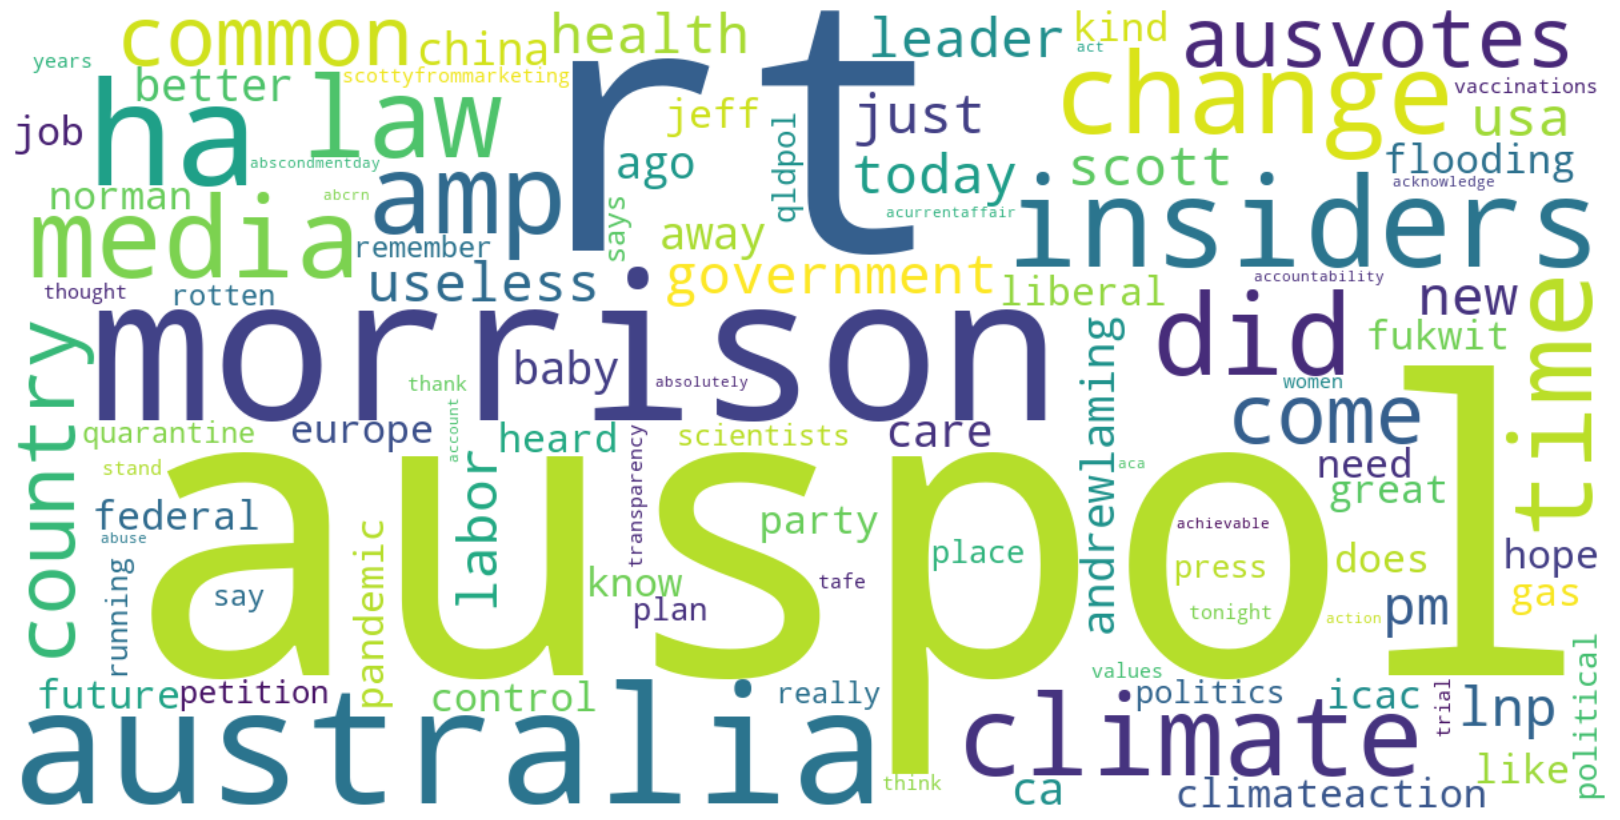

In [8]:
MAX_WORDS = 100
TYPE = 'word'
# TYPE = 'hashtag'
# TYPE = 'mention'
print('Generate a word cloud with one line of code')
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

Or make a wordcloud focusing on another predefined pattern - Hashtag


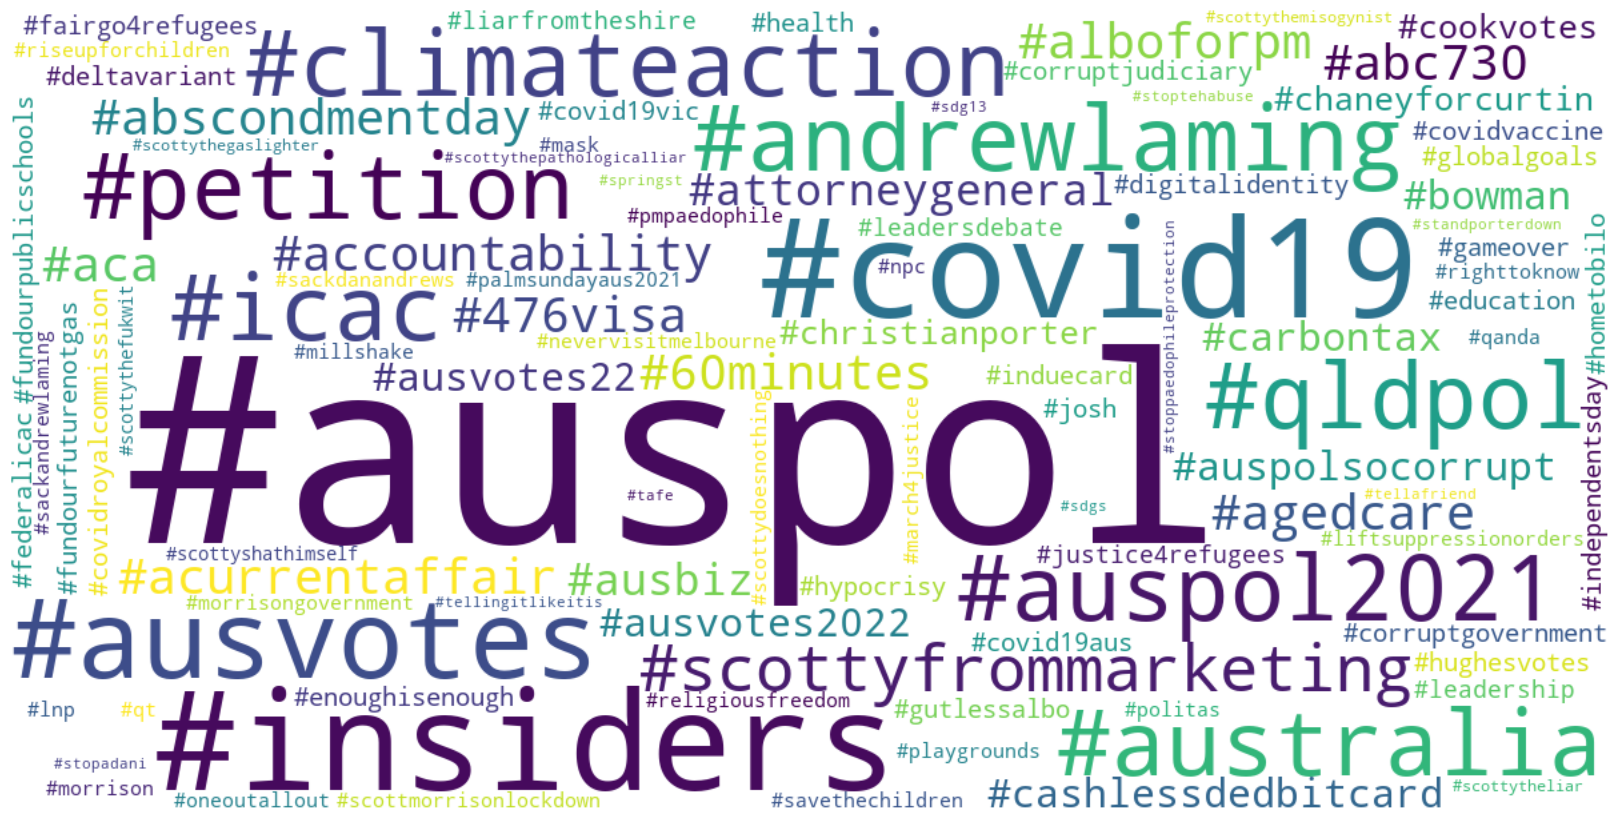

In [9]:
MAX_WORDS = 100
# TYPE = 'word'
TYPE = 'hashtag'
# TYPE = 'mention'
print('Or make a wordcloud focusing on another predefined pattern - Hashtag')
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

### A Timeline of Daily Tweets Number

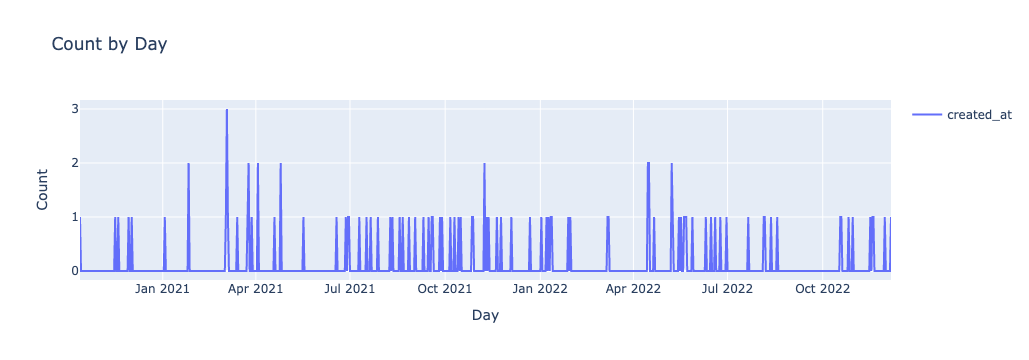

In [10]:
# FREQ = '1w'
# FREQ = '1m'
FREQ = '1d'
COL_TIME = 'created_at'
corpus.viz.timeline(COL_TIME, freq=FREQ)

Can also aggregate the data by different periods, e.g. weekly tweeting numbers


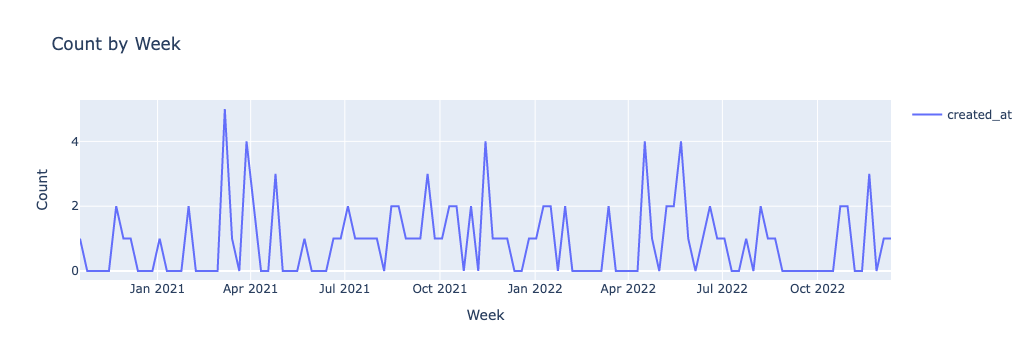

In [11]:
print('Can also aggregate the data by different periods, e.g. weekly tweeting numbers')
corpus.viz.timeline(COL_TIME, freq='1w')

In [12]:
COL_TIME = 'created_at'
FREQ = '1w'

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]
corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, custom_dtm=True)
item_timeline.render()

Extract all Hashtags and display their weekly trends
 - Click legend to deselect items
 - Use the search box to display specific hashtag


FigureWidget({
    'data': [{'marker': {'color': 'rgba(158,195,0,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#auspol',
              'text': [, , , , , , , , , , , , , , , , , , , , 5.0, , , , , , , ,
                       , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,
                       , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,
                       , , , , , , , , , , , , , , , , , , , , , , , , ],
              'textfont': {'color': 'crimson'},
              'textposition': 'bottom center',
              'type': 'scatter',
              'uid': 'd73fb53a-baab-4cc0-9cbb-9cde4ccb1890',
              'x': [2020-10-18 00:00:00, 2020-10-25 00:00:00, 2020-11-01 00:00:00,
                    2020-11-08 00:00:00, 2020-11-15 00:00:00, 2020-11-22 00:00:00,
                    2020-11-29 00:00:00, 2020-12-06 00:00:00, 2020-12-13 00:00:00,
                    2020-12-20 00:00:00, 2020-12-27 00:00:00, 2021-01-03 00:00:00,
       

# Corpus Slicer - creating a subcorpus

## Slice the corpus by categorical metadata - Single or Multiple Choices

In [13]:
temp_corpus = corpora['auspol'].slicer.filter_by_item('lang', 'en')
temp_corpus.name = 'auspol-en'
corpora.add(temp_corpus)
#
temp_corpus = corpora['auspol-en'].slicer.filter_by_item('source', ['Twitter for iPad', 'Twitter for iPhone', 'Twitter for Mac'])
temp_corpus.name = 'Apple'
corpora.add(temp_corpus)

## Slice the corpus by time

In [14]:
temp_corpus = corpora['auspol-en'].slicer.filter_by_datetime('created_at', start='01/03/2022', end='01/06/2022')
temp_corpus.name = 'Autumn22'
corpora.add(temp_corpus)
#
temp_corpus = corpora['auspol-en'].slicer.filter_by_datetime('created_at', start='01/09/2021', end='01/12/2021')
temp_corpus.name = 'Spring21'
corpora.add(temp_corpus)

## Slice the corpus by conditions, customised functions or slice the sub-corpora


In [15]:
import re
temp_corpus = corpora['auspol-en'].slicer.filter_by_condition('retweet_count', lambda cnt: cnt>3)
temp_corpus.name = 'rt5+'
corpora.add(temp_corpus)
#
L_func = '''lambda x: re.match(r'^.*android.*$', x, re.IGNORECASE) is not None'''
temp_corpus = corpora['auspol-en'].slicer.filter_by_condition('source', eval(L_func))
temp_corpus.name = 'Android'
corpora.add(temp_corpus)

## Interactive Widget for Slicing the Corpora

In [16]:
corpora.widget()

# Text Analysis on Corpus

### All exploration can be easily repeated on sub-corpus, e.g. Wordcloud

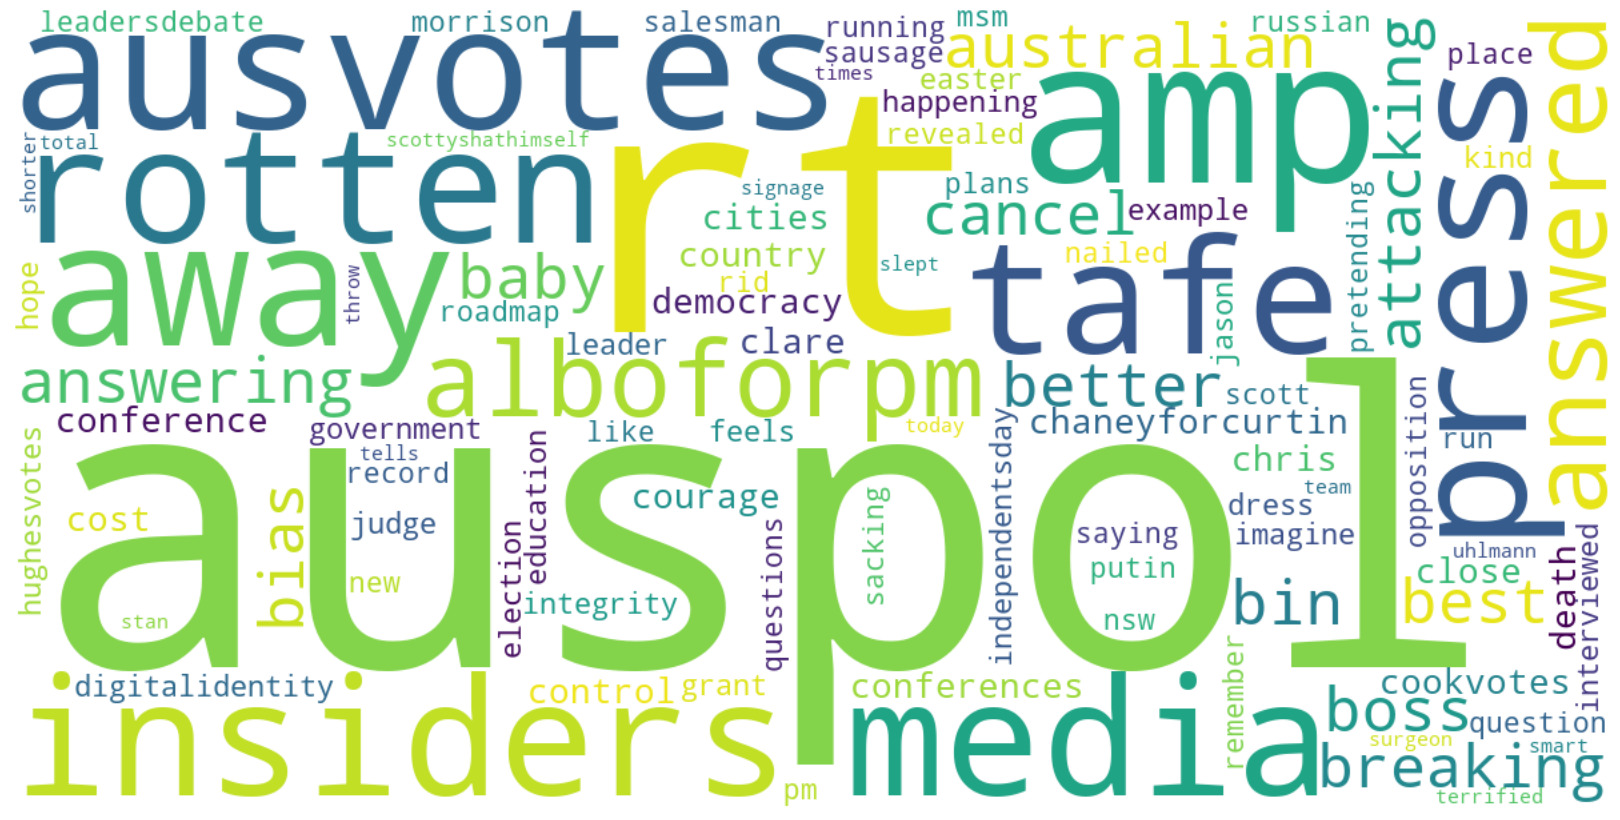

In [17]:
corpora['Autumn22'].viz.wordcloud(max_words=MAX_WORDS, word_type='word')

## LDA Topic Modelling + merge the outcome back to corpus

In [25]:
NUM_TOPICS = 10
lda = LDA(corpora['Autumn22'], num_topics=NUM_TOPICS).build('tf')
lda.add_results_to_corpus()
lda.widget()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.094586 -0.020474       1        1  23.781885
4     -0.040728 -0.064807       2        1  18.400381
6     -0.023215  0.000043       3        1  13.889989
1     -0.015551  0.040117       4        1  13.188616
7     -0.006689  0.011145       5        1   8.145263
3     -0.005422 -0.004335       6        1   6.933675
9     -0.004944  0.006998       7        1   6.738631
8     -0.001114  0.014997       8        1   5.337927
2      0.001721  0.006009       9        1   2.589651
5      0.001355  0.010307      10        1   0.993980, topic_info=           Term      Freq     Total Category  logprob  loglift
452      rotten  0.000000  0.000000  Default  30.0000  30.0000
453          rt  3.000000  3.000000  Default  29.0000  29.0000
44     ausvotes  0.000000  0.000000  Default  28.0000  28.0000
409       press  0.000000  0.000000  Default  27.0000  27.0000
45         away  0.000000  0.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
295      leader  0.002336  0.471277  Topic10  -6.3969  -0.6959
370  opposition  0.002336  0.471277  Topic10  -6.3969  -0.6959
436      record  0.002336  0.471277  Topic10  -6.3969  -0.6959
575      voting  0.002336  0.471277  Topic10  -6.3969  -0.6959
57         best  0.002336  0.471277  Topic10  -6.3969  -0.6959

[520 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
23        1  1.123710       amp
40        1  0.241810    auspol
40        2  0.241810    auspol
40        3  0.241810    auspol
44        2  1.305311  ausvotes
45        1  1.123710      away
328       1  1.123710     media
409       1  1.123710     press
453       2  0.331534        rt
453       3  0.331534        rt
517       1  1.123710      tafe, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 7, 2, 8, 4, 10, 9, 3, 6])

### Create sub-corpus based on the topic model associations

In [26]:
sel_topics = {'a': 4,
             'b': 10}
for t, n in sel_topics.items():
    temp_corpus = corpora['Autumn22'].slicer.filter_by_range('#lda_topic_{}'.format(n), min_=0.5)
    temp_corpus.name = 'Autumn_T'+t
    corpora.add(temp_corpus)

## Daily trends of the selected topics

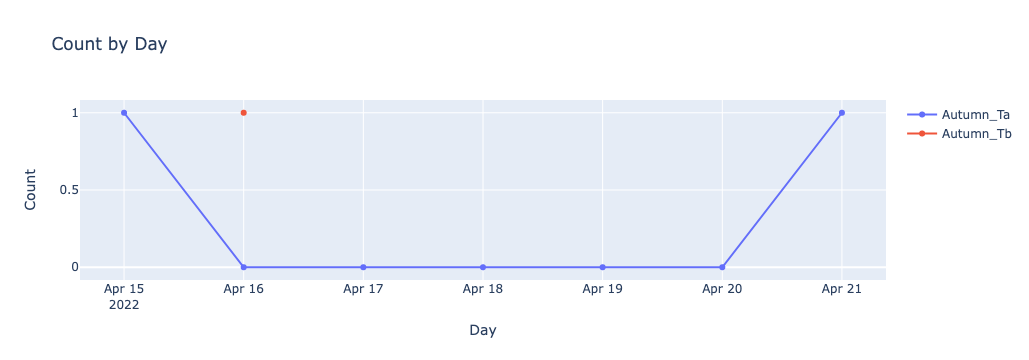

In [27]:
COL_TIME = 'created_at'
FREQ = '1d'
timelines(corpora, ['Autumn_Ta', 'Autumn_Tb'], COL_TIME, FREQ)

# Jux - Compare and highlight the contrasts between any pair of corpora

## Normal Corpus Wordcloud - Side by side, TFIDF

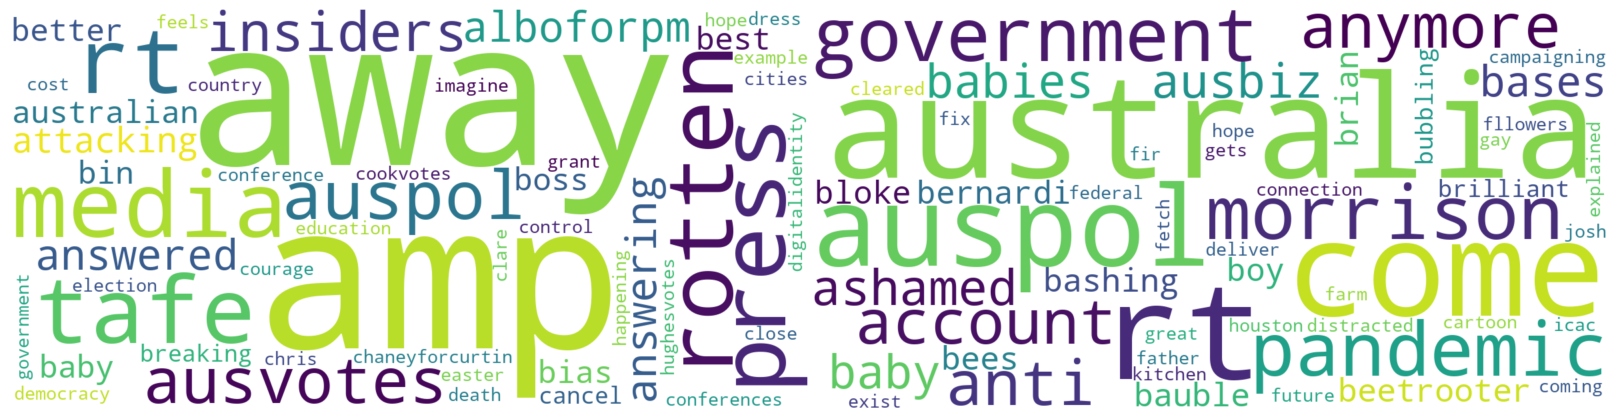

In [18]:
MAX_WORDS = 50
# METRIC = 'tf'
METRIC = 'tfidf'
wordclouds(corpora, ['Autumn22', 'Spring21'], max_words=MAX_WORDS, metric=METRIC)

## Jux Polarity Wordcloud - term frequency

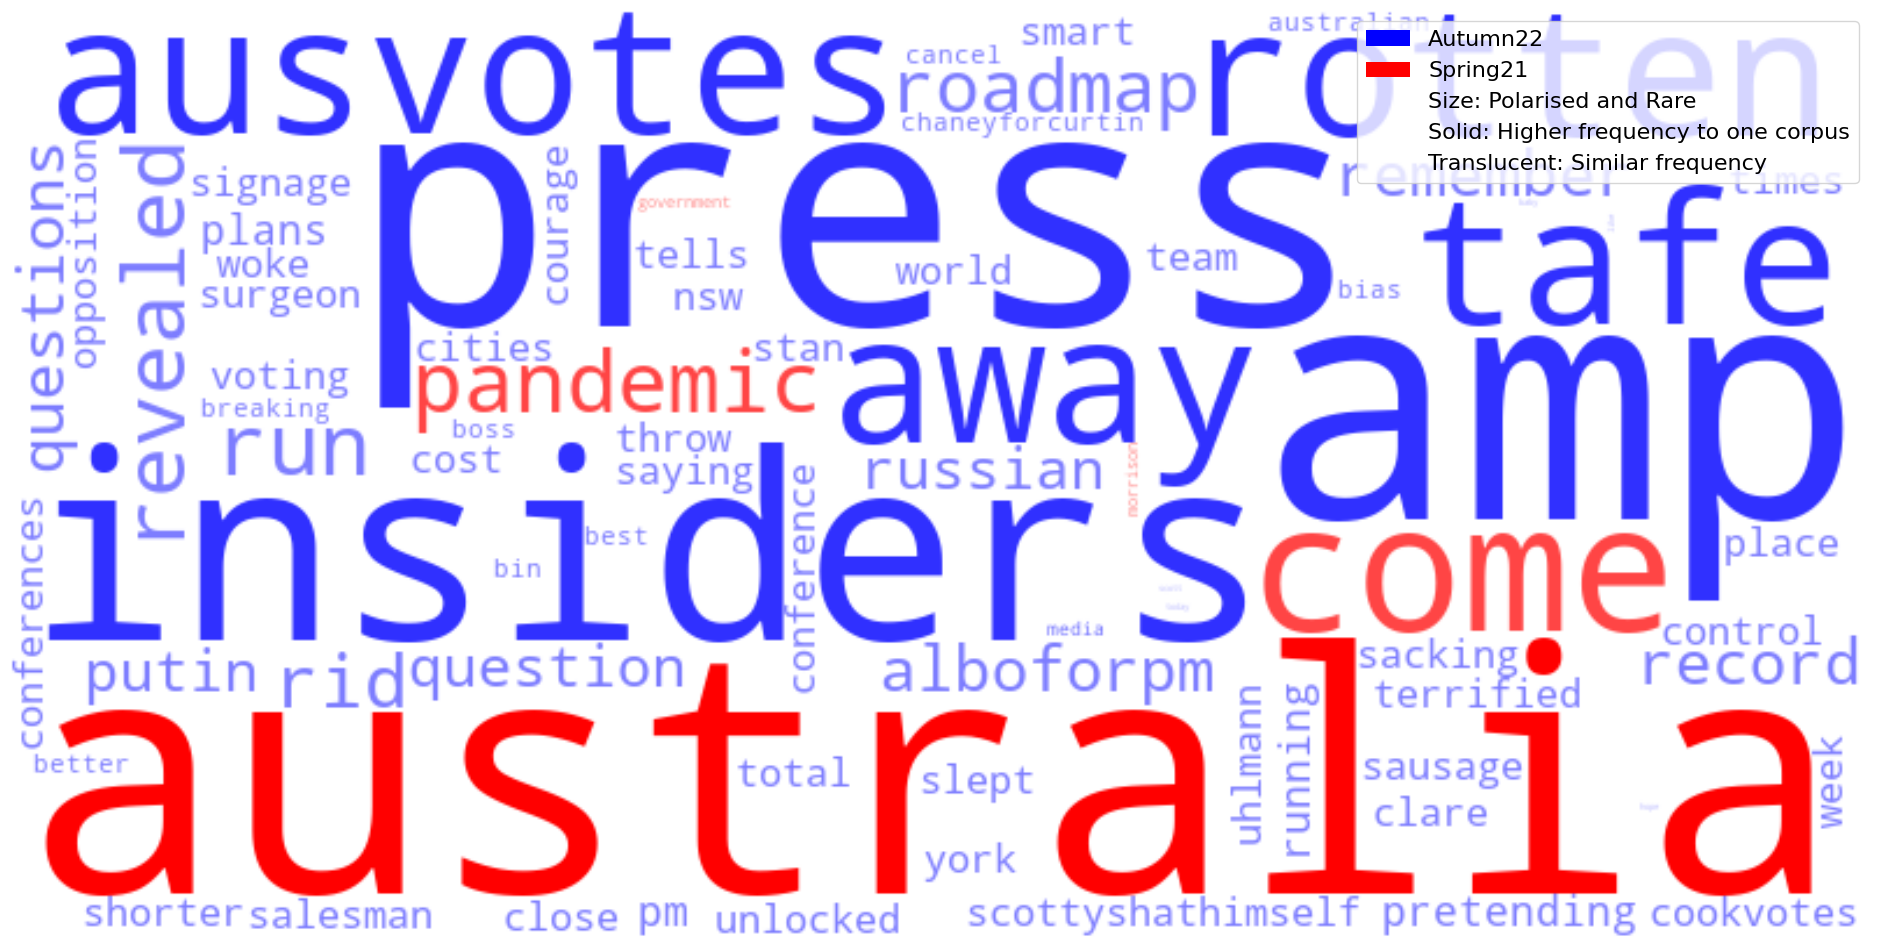

In [19]:
METRIC = 'tf'
# METRIC = 'tfidf'
# METRIC = 'log_likelihood'
TOP = 80
jux_season = Jux(corpora['Autumn22'], corpora['Spring21'])
jux_season.polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'))

### User defined tokenising function

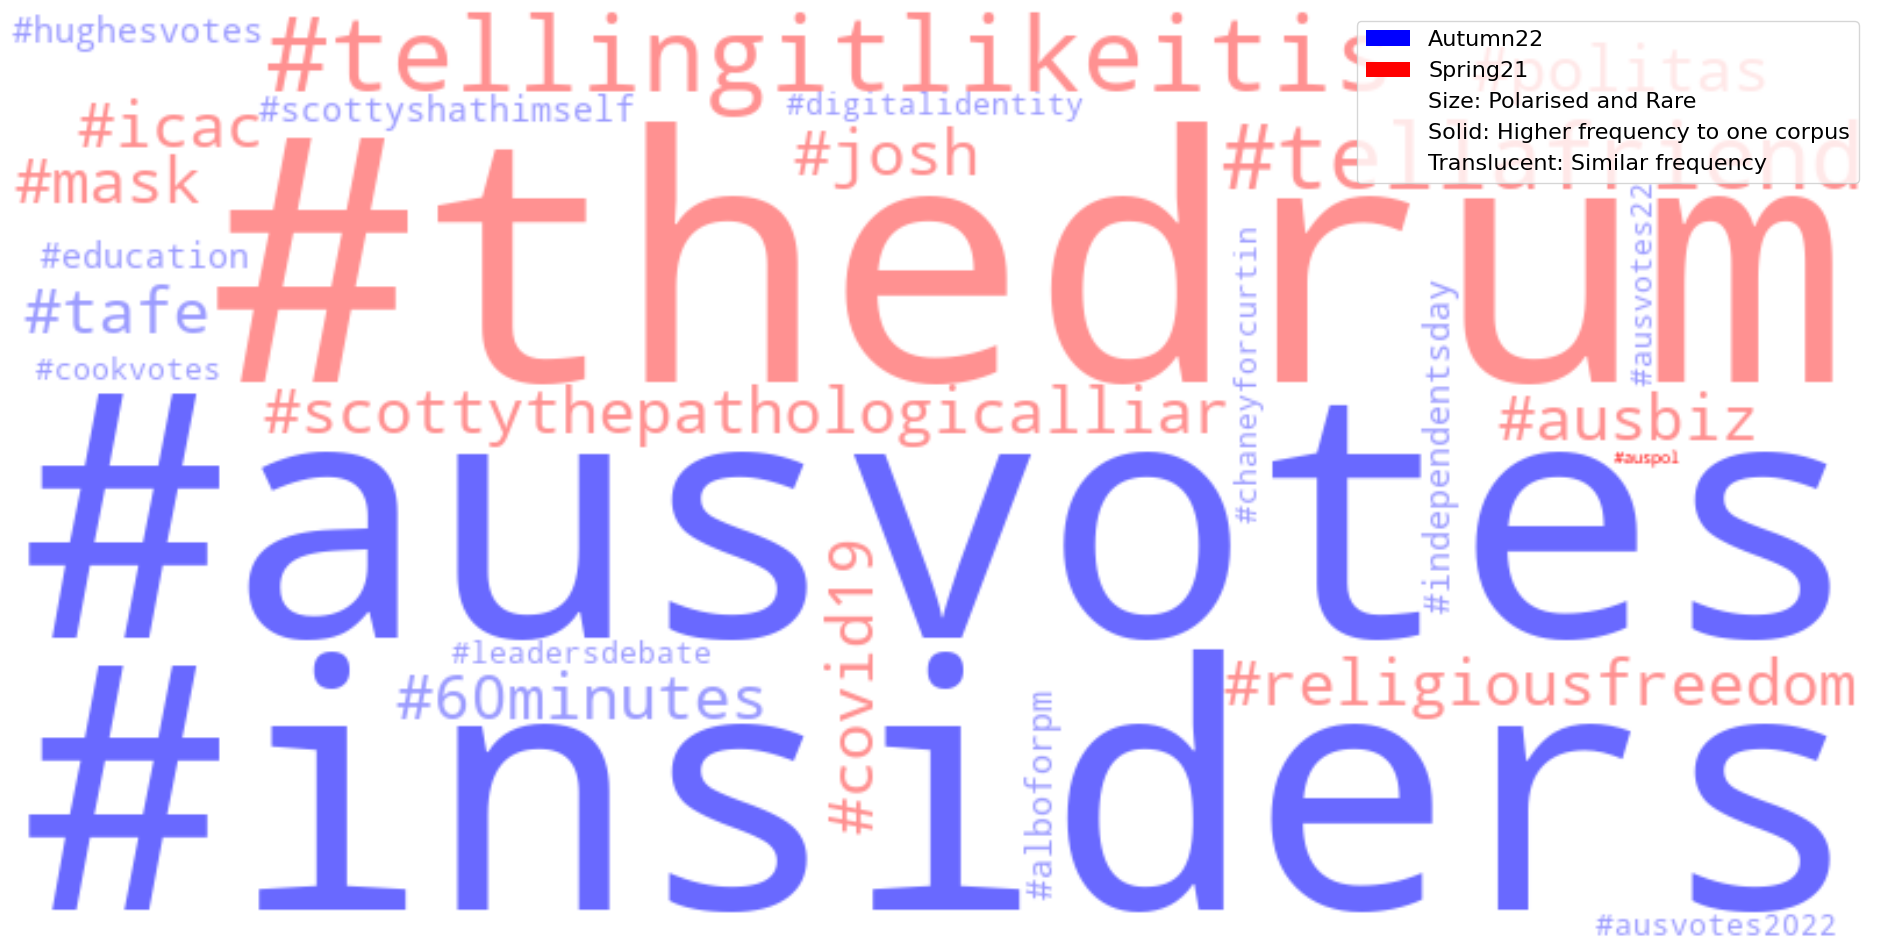

In [20]:
METRIC = 'tf'

# getting hashtags using a user defined function
jux_season.polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'), tokeniser_func=extract_hashtags)

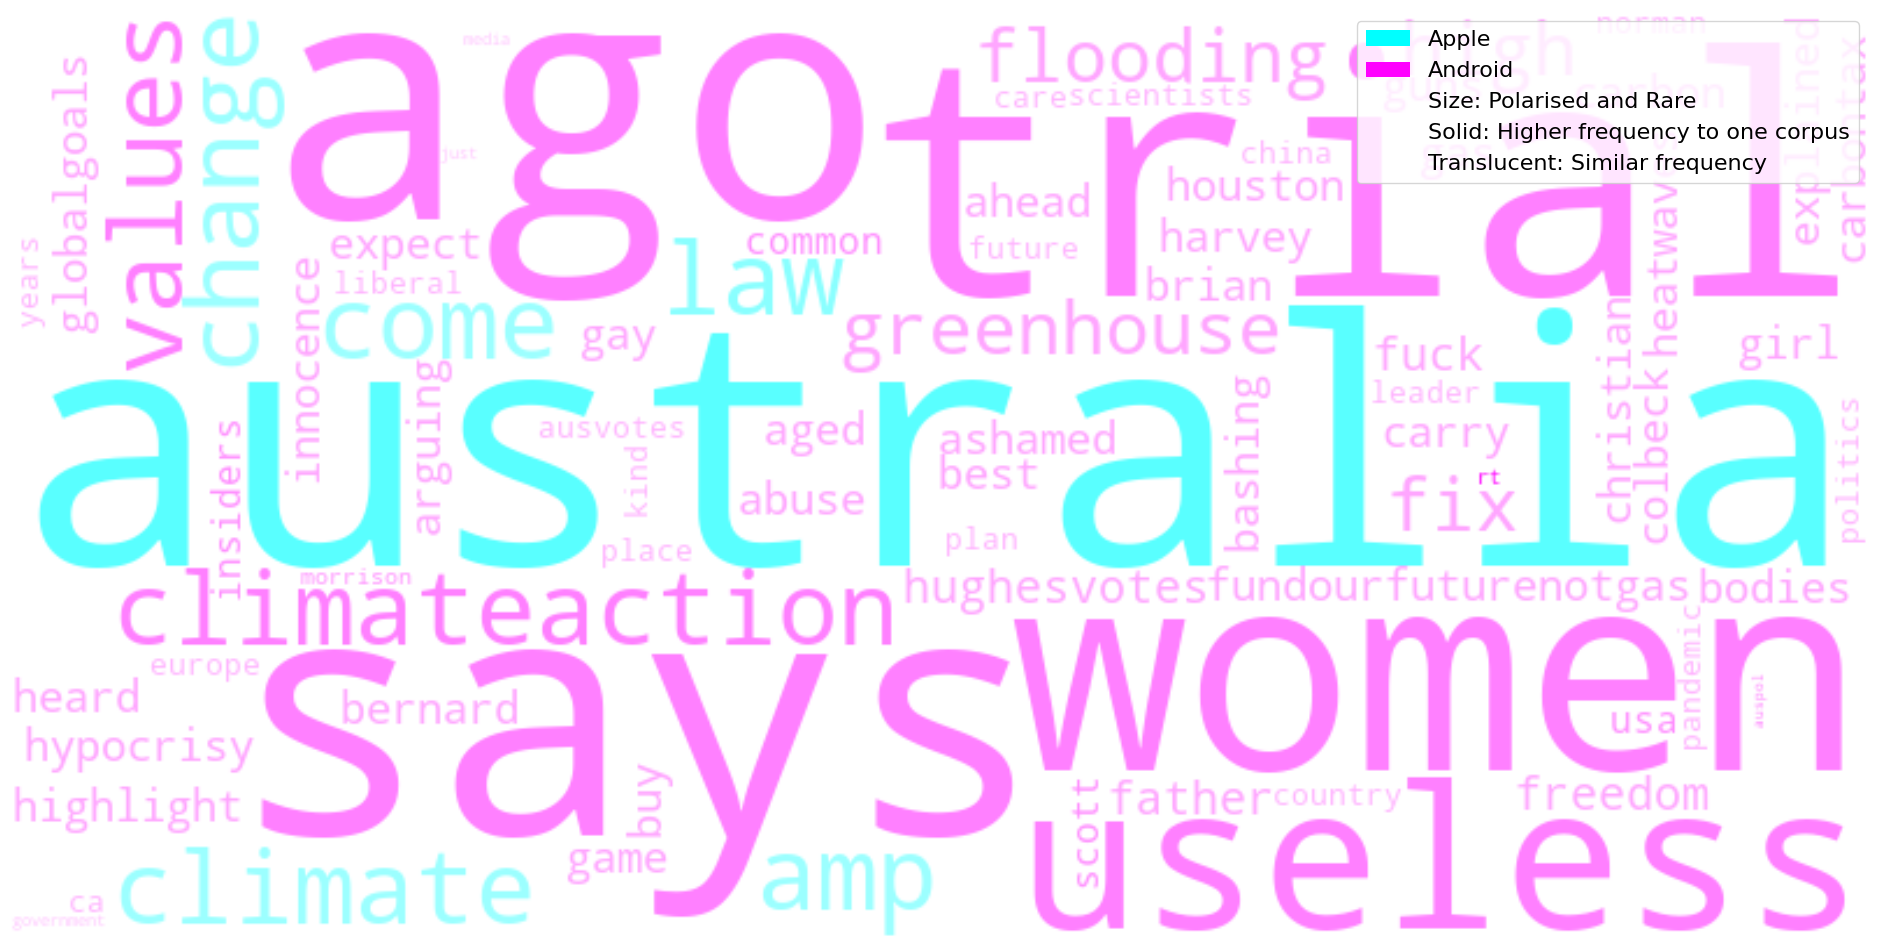

In [21]:
colours = ('cyan', 'magenta')
jux_platform = Jux(corpora['Apple'], corpora['Android'])
jux_platform.polarity.wordcloud('tf', top=TOP, colours=colours)

# Keyword Analysis based on Log Likelihood

Future plans: using Log likelihood to analyse keywords (currently being integrated)


Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
https://ucrel.lancs.ac.uk/llwizard.html

In [22]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

jun_ft = corpora['Spring21'].dtm.freq_table().series
jan_ft = corpora['Autumn22'].dtm.freq_table().series
df_ft = pd.concat([jun_ft.rename('Spring21'), jan_ft.rename('Autumn22')], axis=1, join='outer').fillna(0)
colour = df_ft['Spring21'] > df_ft['Autumn22']

In [23]:
llv = Jux(corpora['Spring21'], corpora['Autumn22']) \
    .stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:30].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)

# Red - Overused in January Corpus, Blue - Overused in July Corpus

## Entity-based Slicing

https://spacy.io/usage/rule-based-matching

In [6]:
from spacy.matcher import Matcher

ent_matcher = Matcher(corpus.nlp.vocab)
ent_matcher.add('entity', [[{'ENT_TYPE': 'ORG'}]])

In [7]:
corpus_org = corpus.slicer.filter_by_matcher(ent_matcher)
len(corpus), len(corpus_org)

(100, 54)

In [8]:
corpus_org.summary()

Corpus Type                                                    SpacyCorpus
Number of Documents                                                     54
Number of Total Words                                                  927
Size of Vocabulary                                                     493
mean Words per Document                                                 17
min Words per Document                                                   3
max Words per Document                                                  53
metas                    id, created_at, source, location, retweet_coun...

# Concordance

In [9]:
from atap_widgets.concordance import ConcordanceTable, ConcordanceWidget, ConcordanceLoader

DataCSV = ConcordanceLoader(type='corpus', df_input=corpus_org)
DataCSV.show()

# Closing

+ Release is planned tentatively in **May**.
+ We will eventually integrate the ATAP tools together so you can easily access it under Corpus.
+ Stay tuned at https://www.atap.edu.au/
+ Feedback Survey at the end of the full workshop.
+ Questions - I'll be around or email me at huen.chan@sydney.edu.au